In [28]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import root, newton
from matplotlib.widgets import Slider, Button

In [24]:
g = 9.81
def iter(t, k, v, phi):
    return (k*v*np.sin(phi)+g)/k**2 * (1 - np.exp(-k*t)) - g/k * t

def iter_ableitung(t, k, v, phi):
    return v*np.sin(phi)*np.exp(-k*t) - g/k * (1-np.exp(-k*t))

def so_weit_bin_ich_gekommen(t, k, v, phi):
    return (v * np.cos(phi)) / k * (1 - np.exp(-k*t))

def newton_zweite_NST(phi, k, v, eps):
    c = 1 + (v*k*np.sin(phi))/g
    t0 = (1/k * np.log(c)) * 2
    while True:
        t_davor = t0
        t0 = t0 - iter(t0, k, v, phi) / iter_ableitung(t0, k, v, phi)
        if np.abs(t_davor - t0) < eps:
            return t0

<Figure size 6000x4000 with 0 Axes>

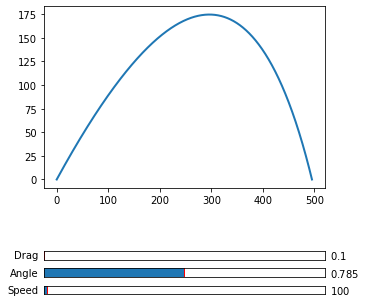

In [45]:
init_phi = np.pi / 4
init_k = 0.1
init_v = 100

c = 1 + (init_v*init_k*np.sin(init_phi))/g
t0 = 1/init_k * np.log(c)
t0 += t0 / 2
t = np.linspace(0, newton_zweite_NST(init_phi, init_k, init_v, 10**-10), 1000)
plt.figure(dpi=1000)

fig, ax = plt.subplots()
line, = plt.plot(so_weit_bin_ich_gekommen(t, init_k, init_v, init_phi), iter(t, init_k, init_v, init_phi), lw=2)

plt.subplots_adjust(left=0.25, bottom=0.25)

axair = plt.axes([0.25, 0, 0.65, 0.03])
air_slider = Slider(
    ax=axair,
    label='Drag',
    valmin=10**-16,
    valmax=100,
    valinit=init_k,
)

axangle = plt.axes([0.25, -0.06, 0.65, 0.03])
angle_slider = Slider(
    ax=axangle,
    label='Angle',
    valmin=10**-30,
    valmax=np.pi / 2,
    valinit=init_phi,
)

axspeed = plt.axes([0.25, -0.12, 0.65, 0.03])
speed_slider = Slider(
    ax=axspeed,
    label='Speed',
    valmin=10**-16,
    valmax=10000,
    valinit=init_v,
)

def update(val):
    c = 1 + (speed_slider.val*air_slider.val*np.sin(angle_slider.val))/g
    t0 = 1/air_slider.val * np.log(c)
    t0 += t0 / 2
    t = np.linspace(0, newton_zweite_NST(angle_slider.val, air_slider.val, speed_slider.val, 10**-10), 1000)
    line.set_xdata(so_weit_bin_ich_gekommen(t, air_slider.val, speed_slider.val, angle_slider.val))
    line.set_ydata(iter(t, air_slider.val, speed_slider.val, angle_slider.val))
    fig.canvas.draw_idle()


air_slider.on_changed(update)
speed_slider.on_changed(update)
angle_slider.on_changed(update)

# plt.plot(so_weit_bin_ich_gekommen(t, init_k, init_v, init_phi), iter(t, init_k, init_v, init_phi))
# plt.title('AWP')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.grid(True)
plt.show()